<a href="https://colab.research.google.com/github/domywillygithub/Codes/blob/main/TSA2023_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scaleogram

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pywt
import numpy as np
import scaleogram as scg
import matplotlib.pyplot as plt 
import scipy.fftpack as fftpack 
import pandas as pd


TypeError: ignored

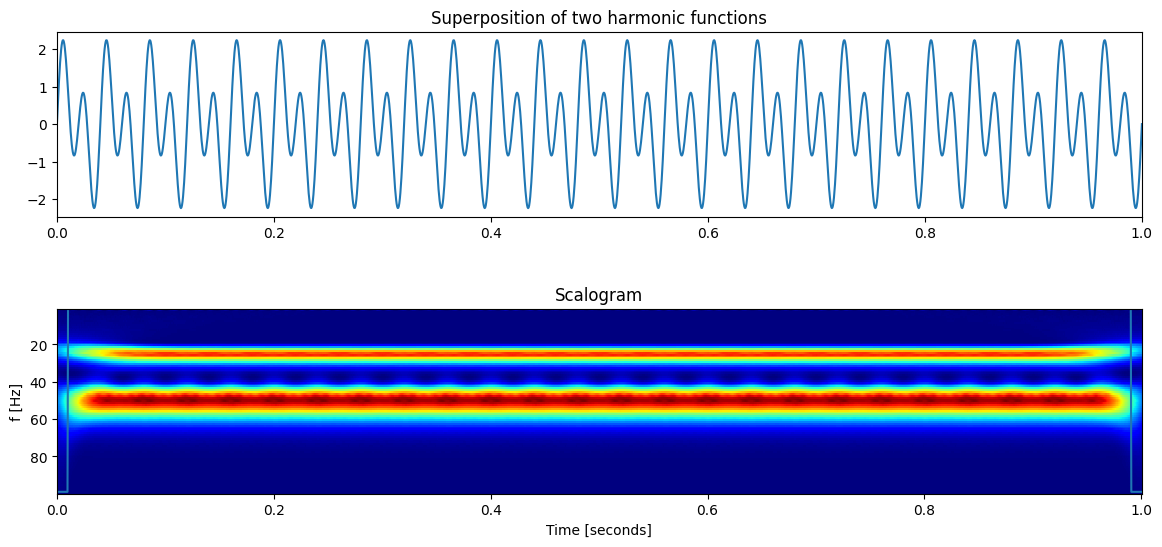

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n = 2048
dt=1/n
time=np.linspace(0,1,num=n)
p1 =25;f1=p1
p2 =50;f2=p2
data = np.sin( (2*np.pi*f1) * time) + 1.5*np.sin( (2*np.pi*f2) * time)
wavelet='cmor0.8-1.5'
fa=np.arange(1,100) 
a=pywt.central_frequency(wavelet)/( dt * fa)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5)
ax1.plot(time, data); ax1.set_xlim(0, 1)
ax1.set_title('Superposition of two harmonic functions')
ax2 = scg.cws(time, data, scales=a, wavelet=wavelet, yaxis='frequency',spectrum='power',
              ax=ax2, cmap="jet", ylabel="f [Hz]", xlabel="Time [seconds]",
              yscale='linear', title='Scalogram')
ax2.set_ylim(0, 100)

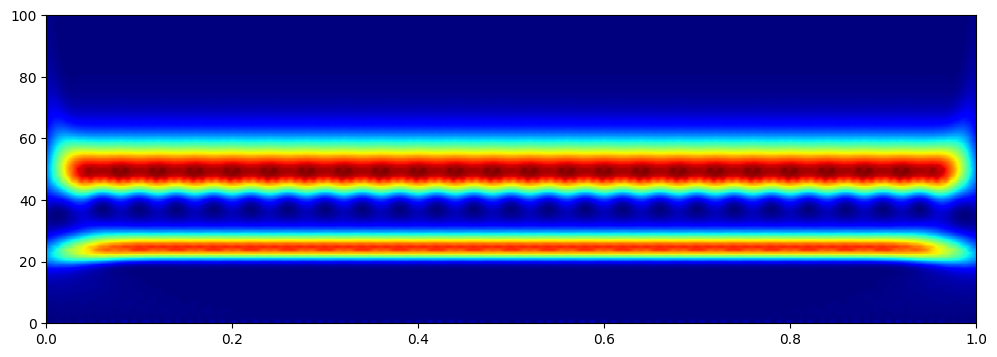

In [ ]:
coeff,freqs=pywt.cwt(data,a,wavelet,dt)
cwtPower=abs(coeff)**2
fig, ax=plt.subplots(figsize=(12, 4)) 
im=ax.imshow(cwtPower[::-1],aspect='auto',cmap="jet",extent=[0,1,0,100])

In [ ]:
import pywt
import numpy as np
import scaleogram as scg
import matplotlib.pyplot as plt 
import scipy.fftpack as fftpack 
import pandas as pd


    

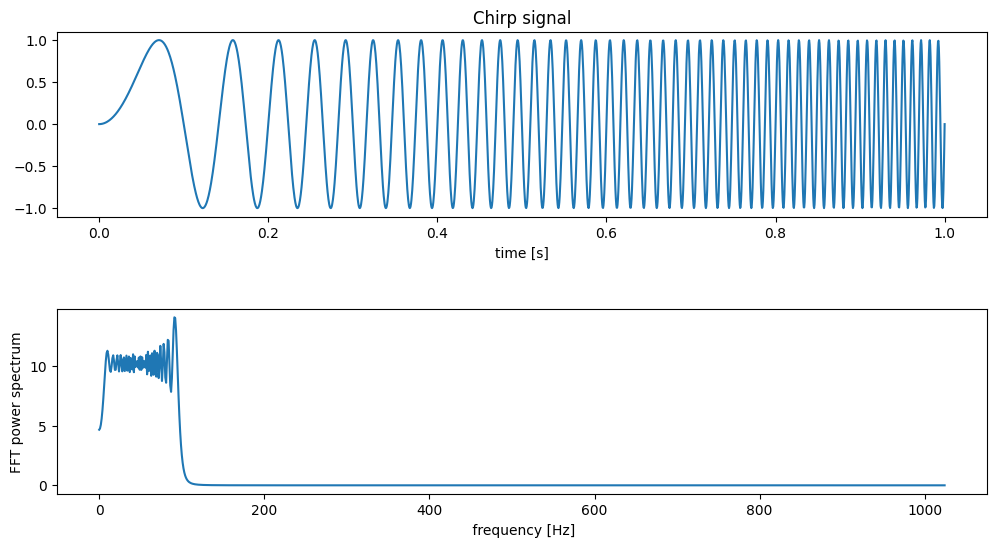

In [ ]:
N=2048
f1=100
time=np.linspace(0,1,num=N)
dt=1/N 
chirp_signal=np.sin(f1*np.pi*time**2) 
fft=fftpack.fft(chirp_signal) 
freqs=np.linspace(0.0,1.0/(2*dt), int(N/2))
fig, (ax1, ax2)=plt.subplots(2,1, figsize=(12, 6)) 
fig.subplots_adjust(hspace=0.5) 
ax1.plot(time,chirp_signal)
ax1.set_title('Chirp signal')
ax1.set_xlabel('time [s]')
ax2.plot(freqs, (2.0/N)* (np.abs(fft[:N//2])**2)) 
ax2.set_xlabel(' frequency [Hz]') 
ax2.set_ylabel('FFT power spectrum')
plt.show()

TypeError: ignored

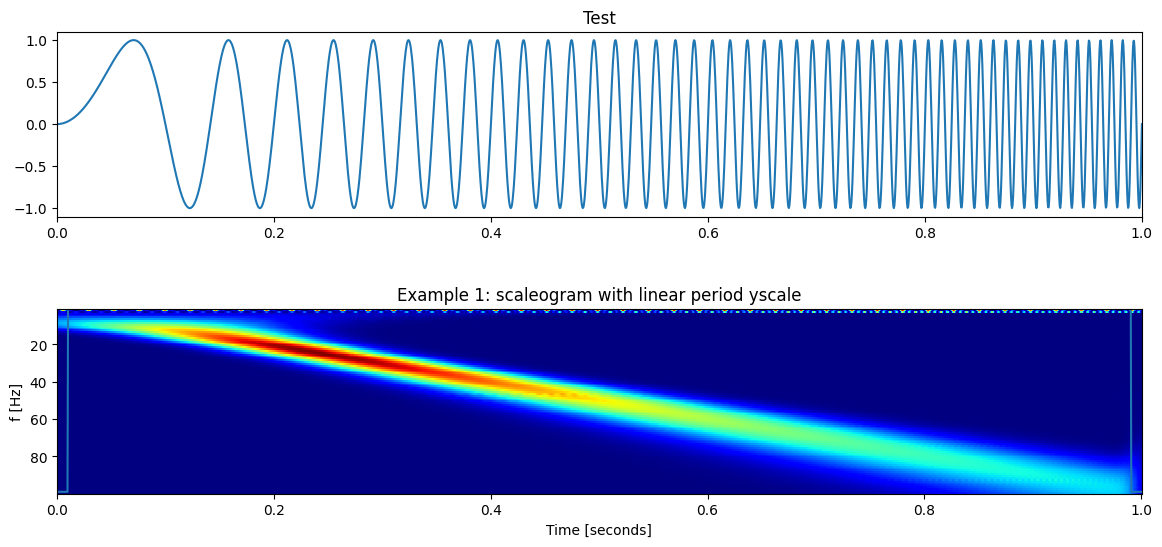

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
wavelet='cmor0.8-1.5'
fa=np.arange(1,100) 
a=pywt.central_frequency(wavelet)/( dt * fa)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6)) 
fig.subplots_adjust(hspace=0.5)
ax1.plot(time, chirp_signal); ax1.set_xlim(0, 1) 
ax1.set_title('Test')
ax2 = scg.cws(time, chirp_signal, scales=a, wavelet=wavelet,
              yaxis='frequency',spectrum='power', 
              ax=ax2, cmap="jet", ylabel="f [Hz]", 
              xlabel="Time [seconds]", yscale='linear',
              title='Example 1: scaleogram with linear period yscale') 
ax2.set_ylim(0, 100)


In [9]:
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [1]:
# !pip install pywavelets
# !pip install wget tqdm


import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywt

import os

from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import torch
import pandas as pd
import numpy as np
import os
import urllib.request
import zipfile

# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
filename = 'UCI HAR Dataset.zip'
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

# Extract the dataset
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
# Load the Inertia signals
body_acc_x = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', header=None, delim_whitespace=True)
body_acc_y = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt', header=None, delim_whitespace=True)
body_acc_z = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt', header=None, delim_whitespace=True)
body_gyro_x = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt', header=None, delim_whitespace=True)
body_gyro_y = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt', header=None, delim_whitespace=True)
body_gyro_z = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt', header=None, delim_whitespace=True)
total_acc_x = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', header=None, delim_whitespace=True)
total_acc_y = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', header=None, delim_whitespace=True)
total_acc_z = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', header=None, delim_whitespace=True)

# Convert the Inertia signals to PyTorch tensors
body_acc_x = torch.tensor(body_acc_x.values, dtype=torch.float32)
body_acc_y = torch.tensor(body_acc_y.values, dtype=torch.float32)
body_acc_z = torch.tensor(body_acc_z.values, dtype=torch.float32)
body_gyro_x = torch.tensor(body_gyro_x.values, dtype=torch.float32)
body_gyro_y = torch.tensor(body_gyro_y.values, dtype=torch.float32)
body_gyro_z = torch.tensor(body_gyro_z.values, dtype=torch.float32)
total_acc_x = torch.tensor(total_acc_x.values, dtype=torch.float32)
total_acc_y = torch.tensor(total_acc_y.values, dtype=torch.float32)
total_acc_z = torch.tensor(total_acc_z.values, dtype=torch.float32)

# Concatenate the Inertia signals along the channel dimension
train_data = torch.stack([body_acc_x, body_acc_y, body_acc_z, body_gyro_x, body_gyro_y, body_gyro_z, total_acc_x, total_acc_y, total_acc_z], dim=1)
# Add an extra dimension to the tensor
train_data = torch.unsqueeze(train_data, dim=3)

# Repeat the tensor along the last dimension to get the desired shape
train_data = train_data.repeat(1, 1, 1, 128)

# Load the labels
train_labels = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)

# Convert the labels to PyTorch tensors
train_targets = torch.tensor(train_labels.values.ravel(), dtype=torch.int64)


In [4]:
# Load the Inertia signals
body_acc_x = pd.read_csv('UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt', header=None, delim_whitespace=True)
body_acc_y = pd.read_csv('UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt', header=None, delim_whitespace=True)
body_acc_z = pd.read_csv('UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt', header=None, delim_whitespace=True)
body_gyro_x = pd.read_csv('UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt', header=None, delim_whitespace=True)
body_gyro_y = pd.read_csv('UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt', header=None, delim_whitespace=True)
body_gyro_z = pd.read_csv('UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt', header=None, delim_whitespace=True)
total_acc_x = pd.read_csv('UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt', header=None, delim_whitespace=True)
total_acc_y = pd.read_csv('UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt', header=None, delim_whitespace=True)
total_acc_z = pd.read_csv('UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt', header=None, delim_whitespace=True)

# Convert the Inertia signals to PyTorch tensors
body_acc_x = torch.tensor(body_acc_x.values, dtype=torch.float32)
body_acc_y = torch.tensor(body_acc_y.values, dtype=torch.float32)
body_acc_z = torch.tensor(body_acc_z.values, dtype=torch.float32)
body_gyro_x = torch.tensor(body_gyro_x.values, dtype=torch.float32)
body_gyro_y = torch.tensor(body_gyro_y.values, dtype=torch.float32)
body_gyro_z = torch.tensor(body_gyro_z.values, dtype=torch.float32)
total_acc_x = torch.tensor(total_acc_x.values, dtype=torch.float32)
total_acc_y = torch.tensor(total_acc_y.values, dtype=torch.float32)
total_acc_z = torch.tensor(total_acc_z.values, dtype=torch.float32)

# Concatenate the Inertia signals along the channel dimension
test_data = torch.stack([body_acc_x, body_acc_y, body_acc_z, body_gyro_x, body_gyro_y, body_gyro_z, total_acc_x, total_acc_y, total_acc_z], dim=1)
# Add an extra dimension to the tensor
test_data = torch.unsqueeze(test_data, dim=3)

# Repeat the tensor along the last dimension to get the desired shape
test_data = test_data.repeat(1, 1, 1, 128)

# Load the labels
test_labels = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, delim_whitespace=True)

# Convert the labels to PyTorch tensors
test_targets = torch.tensor(test_labels.values.ravel(), dtype=torch.int64)

In [5]:
# Split the training data into training and validation sets
num_train = int(0.8 * len(train_data))
train_indices = torch.randperm(len(train_data))[:num_train]
valid_indices = torch.randperm(len(train_data))[num_train:]
train_dataset = torch.utils.data.TensorDataset(train_data[train_indices], train_targets[train_indices])
valid_dataset = torch.utils.data.TensorDataset(train_data[valid_indices], train_targets[valid_indices])
test_dataset = torch.utils.data.TensorDataset(test_data, test_targets)

In [ ]:
valid_targets = train_dataset.tensors[1]
unique_valid_targets = torch.unique(valid_targets)
print(unique_valid_targets)

tensor([1, 2, 3, 4, 5, 6])


In [6]:
# Save the datasets to disk
torch.save(train_dataset, './train_dataset.pt')
torch.save(valid_dataset, './valid_dataset.pt')
torch.save(test_dataset, './test_dataset.pt')

In [7]:
train_dataset = "./train_dataset.pt"
valid_dataset = "./valid_dataset.pt"
test_dataset = "./test_dataset.pt"

# load data
train_data = torch.load(train_dataset)
valid_data = torch.load(valid_dataset)
test_data = torch.load(test_dataset)

In [8]:
batch_size = 128

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

len(train_dataloader), len(train_dataloader.dataset), len(valid_dataloader), len(valid_dataloader.dataset), len(test_dataloader), len(test_dataloader.dataset)

(46, 5881, 12, 1471, 24, 2947)

In [ ]:
num_batches = len(train_dataloader)
batch_shape = next(iter(train_dataloader))[0].shape
print(f"Train dataloader shape: {num_batches} x {batch_shape}")

Train dataloader shape: 46 x torch.Size([128, 9, 128, 128])


In [10]:
class CNN(nn.Module):
  def __init__(self, filters, hidden_units, dropout=0.2):
    super(CNN, self).__init__()
    self.dropout = dropout
    self.conv1 = nn.Conv2d(in_channels=9, out_channels=filters, kernel_size=5)
    self.bn1 = nn.BatchNorm2d(num_features=filters)
    self.conv2 = nn.Conv2d(in_channels=filters, out_channels=32, kernel_size=5)
    self.bn2 = nn.BatchNorm2d(num_features=32)
    self.fc1 = nn.Linear(in_features=32 * 4 * 4, out_features=hidden_units)
    self.fc2 = nn.Linear(in_features=hidden_units, out_features=7)

  def forward(self, x):
    x = self.conv1(x)
    x = F.max_pool2d(x, 5)
    x = self.bn1(F.relu(x))

    x = self.conv2(x)
    x = F.max_pool2d(x, 5)
    x = self.bn2(F.relu(x))

    x = F.dropout(x, 0.1)

    x = torch.flatten(x, start_dim=1)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, self.dropout)
    x = self.fc2(x)

    return F.log_softmax(x, dim=1)

In [13]:
def validation(model, device, dataloader, return_output=False):
  model.eval()
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  all_output = torch.zeros((len(dataloader), batch_size))
  all_output = list()
  with torch.inference_mode():
    avg_loss = 0
    avg_acc = 0
    for i, (X, y) in tqdm(enumerate(dataloader), total=len(dataloader), desc="validation"):
      X, y = X.to(device), y.to(device)
      output = model(X)
      for val in torch.argmax(output, dim=1).ravel().cpu():
        all_output.append(val)
      loss = criterion(output, y)
      avg_loss += loss.item()
      avg_acc += (torch.argmax(output, dim=1) == y).float().mean().item()

    avg_acc /= len(dataloader) 
    avg_loss /= len(dataloader)

  model.train()

  if return_output:
    return all_output, avg_acc, avg_loss
  
  return avg_acc, avg_loss

def train_loop(model, dataloader, valid_dataloader, test_dataloader, device, epochs, learning_rate=1e-4, momentum=0.9, wd=0, use_scheduler=False):
  model.train()
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=wd, betas=(momentum, 0.999))
  if use_scheduler:
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)
  train_losses = []
  val_losses = []
  test_losses = []
  for epoch in tqdm(range(epochs), desc="training"): 
    curr_loss = 0
    for i, (X, y) in enumerate(dataloader):
      optimizer.zero_grad()
      X, y = X.to(device), y.to(device)
      output = model(X)
      loss = criterion(output, y)
      curr_loss += loss.item()
      loss.backward()
      optimizer.step()
      if i % 50 == 0:
        print(f"[Epoch {(epoch+1):3d}/{epochs:3d}][{i:3d}/{len(dataloader):3d}]_loss: {loss.item():.6f}")
    if use_scheduler:
      scheduler.step()
    curr_loss /= len(dataloader)
    val_acc, val_loss = validation(model, device, valid_dataloader)
    test_acc, test_loss = validation(model, device, test_dataloader)
    print(f"[Epoch {(epoch+1):3d}/{epochs:3d}] train_loss: {curr_loss:.6f}, val_loss: {val_loss:.6f}, val_acc: {val_acc:2.6f}, test_acc: {test_acc:2.6f}")
    train_losses.append(curr_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)
  
  plt.plot(train_losses, label="train")
  plt.plot(val_losses, label="validation")
  plt.plot(test_losses, label="test")
  plt.legend()
  plt.grid()
  plt.show()

  return val_acc, val_loss, test_acc, test_loss

training:   0%|          | 0/10 [00:00<?, ?it/s]

[Epoch   1/ 10][  0/ 46]_loss: 2.095176



validation: 100%|██████████| 12/12 [00:27<00:00,  2.26s/it]

training:  10%|█         | 1/10 [05:23<48:32, 323.61s/it]

[Epoch   1/ 10] train_loss: 1.425880, val_loss: 1.106750, val_acc: 0.746331, test_acc: 0.703668
[Epoch   2/ 10][  0/ 46]_loss: 0.986341



validation: 100%|██████████| 12/12 [00:27<00:00,  2.25s/it]

training:  20%|██        | 2/10 [10:42<42:47, 320.94s/it]

[Epoch   2/ 10] train_loss: 0.754788, val_loss: 0.546240, val_acc: 0.920490, test_acc: 0.868164
[Epoch   3/ 10][  0/ 46]_loss: 0.513368



validation: 100%|██████████| 12/12 [00:27<00:00,  2.27s/it]

training:  30%|███       | 3/10 [16:02<37:24, 320.62s/it]

[Epoch   3/ 10] train_loss: 0.441568, val_loss: 0.341258, val_acc: 0.951131, test_acc: 0.902669
[Epoch   4/ 10][  0/ 46]_loss: 0.365375



validation: 100%|██████████| 12/12 [00:27<00:00,  2.25s/it]

training:  40%|████      | 4/10 [21:20<31:55, 319.24s/it]

[Epoch   4/ 10] train_loss: 0.309345, val_loss: 0.267113, val_acc: 0.952433, test_acc: 0.913086
[Epoch   5/ 10][  0/ 46]_loss: 0.284425



validation: 100%|██████████| 12/12 [00:27<00:00,  2.28s/it]

training:  50%|█████     | 5/10 [26:36<26:32, 318.41s/it]

[Epoch   5/ 10] train_loss: 0.262737, val_loss: 0.229187, val_acc: 0.955688, test_acc: 0.918945
[Epoch   6/ 10][  0/ 46]_loss: 0.188004



validation: 100%|██████████| 12/12 [00:27<00:00,  2.27s/it]

training:  60%|██████    | 6/10 [31:55<21:13, 318.32s/it]

[Epoch   6/ 10] train_loss: 0.242239, val_loss: 0.205303, val_acc: 0.955016, test_acc: 0.917318
[Epoch   7/ 10][  0/ 46]_loss: 0.196354



validation: 100%|██████████| 12/12 [00:28<00:00,  2.35s/it]

training:  70%|███████   | 7/10 [37:22<16:04, 321.35s/it]

[Epoch   7/ 10] train_loss: 0.215755, val_loss: 0.201741, val_acc: 0.956969, test_acc: 0.920247
[Epoch   8/ 10][  0/ 46]_loss: 0.202419



validation: 100%|██████████| 12/12 [00:26<00:00,  2.24s/it]

training:  80%|████████  | 8/10 [42:48<10:45, 322.70s/it]

[Epoch   8/ 10] train_loss: 0.202691, val_loss: 0.189836, val_acc: 0.953673, test_acc: 0.921549
[Epoch   9/ 10][  0/ 46]_loss: 0.167451



validation: 100%|██████████| 12/12 [00:27<00:00,  2.30s/it]

training:  90%|█████████ | 9/10 [48:11<05:22, 322.88s/it]

[Epoch   9/ 10] train_loss: 0.192797, val_loss: 0.186074, val_acc: 0.953714, test_acc: 0.928385
[Epoch  10/ 10][  0/ 46]_loss: 0.183188



validation: 100%|██████████| 12/12 [00:28<00:00,  2.35s/it]

training: 100%|██████████| 10/10 [53:36<00:00, 321.69s/it]


[Epoch  10/ 10] train_loss: 0.184356, val_loss: 0.167770, val_acc: 0.961589, test_acc: 0.930013


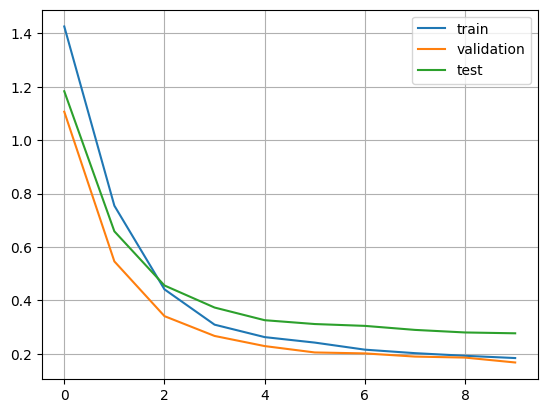

Validation accuracy: 0.961589, Validation loss: 0.167770, Test accuracy: 0.930013, Test loss: 0.277022


In [14]:
import torch.backends.cudnn as cudnn

# Set the random seed
cudnn.deterministic = True
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
cnn = CNN(filters=64, hidden_units=128, dropout=0.5).to(device)

val_acc, val_loss, test_acc, test_loss = train_loop(model=cnn, dataloader=train_dataloader, valid_dataloader=valid_dataloader,
                                      test_dataloader=test_dataloader, device=device, epochs=10, learning_rate=7e-5, momentum=0.85, wd=0.09, use_scheduler=False)

print(f"Validation accuracy: {val_acc:.6f}, Validation loss: {val_loss:.6f}, Test accuracy: {test_acc:.6f}, Test loss: {test_loss:.6f}")

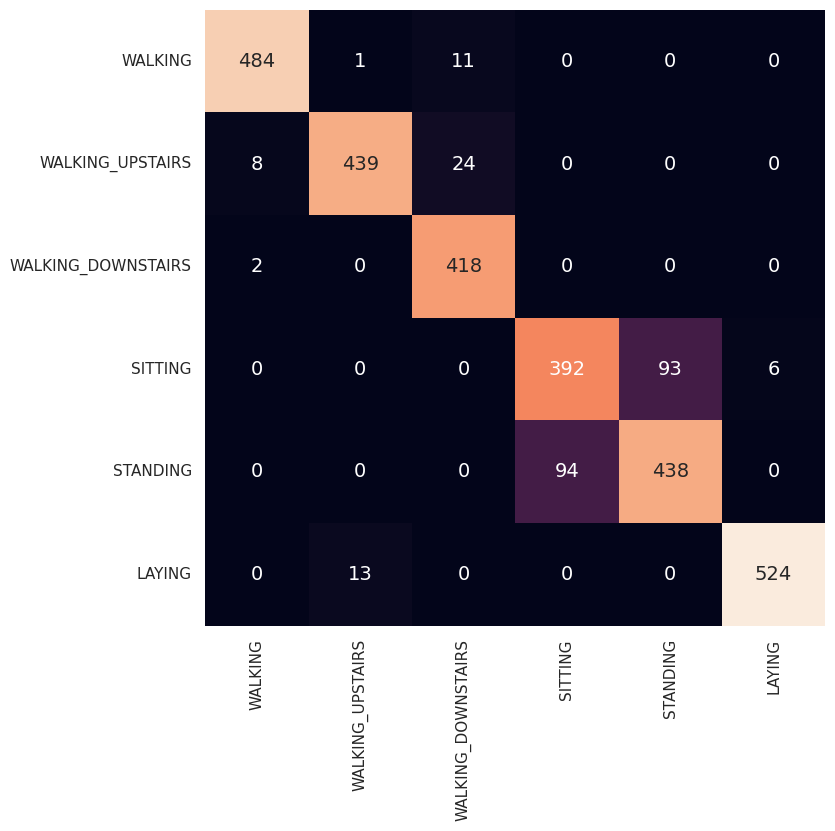

In [ ]:
output, _, _ = validation(cnn, device, test_dataloader, return_output=True)

target = list()

for (_, y) in test_dataloader:
    for val in y:
        target.append(val)
        
c_labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

cm = confusion_matrix(target, output)
sns.set()
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, annot_kws={"fontsize":14},  fmt=".3g", xticklabels=c_labels, yticklabels=c_labels, cbar=False)
plt.show()